In [248]:
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import numpy as np
from sklearn.linear_model import LinearRegression


In [249]:
!pip install pandas 

!pip install scikit-learn


Wells Fargo Given DataSet 

In [250]:
df = pd.read_csv('/Users/eric/Documents/Github/Personal_Bank_Budgeting/Checking1.csv') 
df.head()

#import my data set


,12/30/22,-17,*,Venmo,PURCHASE AUTHORIZED ON 12/30 VENMO* Visa Direct NY S302364781105329 CARD 7605
0,12/30/22,-4.00,*,Venmo,PURCHASE AUTHORIZED ON 12/29 VENMO* Visa Direc...
1,12/30/22,-5.25,*,Food,PURCHASE AUTHORIZED ON 12/28 BEI YUAN TEA & BO...
2,12/28/22,-6.00,*,Venmo,PURCHASE AUTHORIZED ON 12/27 VENMO* San Jose C...
3,12/27/22,-2.75,*,Venmo,PURCHASE AUTHORIZED ON 12/27 VENMO* Visa Direc...
4,12/27/22,-7.00,*,Venmo,PURCHASE AUTHORIZED ON 12/27 VENMO* Visa Direc...


General Bank Statement

- Includes money earned and spent

In [251]:
df.rename(columns={'12/30/22': 'Dates'},inplace=True)
df.rename(columns={'-17': 'Money Spent'},inplace=True)
df.rename(columns={'Venmo':'Type of Transaction'},inplace=True)
df.rename(columns={'PURCHASE AUTHORIZED ON 12/30 VENMO* Visa Direct NY S302364781105329 CARD 7605':'Transaction'},inplace=True)
del df['*']
df.head()

#rename columns to make more sense, remove null column '*'

,Dates,Money Spent,Type of Transaction,Transaction
0,12/30/22,-4.00,Venmo,PURCHASE AUTHORIZED ON 12/29 VENMO* Visa Direc...
1,12/30/22,-5.25,Food,PURCHASE AUTHORIZED ON 12/28 BEI YUAN TEA & BO...
2,12/28/22,-6.00,Venmo,PURCHASE AUTHORIZED ON 12/27 VENMO* San Jose C...
3,12/27/22,-2.75,Venmo,PURCHASE AUTHORIZED ON 12/27 VENMO* Visa Direc...
4,12/27/22,-7.00,Venmo,PURCHASE AUTHORIZED ON 12/27 VENMO* Visa Direc...


In [252]:
df

,Dates,Money Spent,Type of Transaction,Transaction
0,12/30/22,-4.00,Venmo,PURCHASE AUTHORIZED ON 12/29 VENMO* Visa Direc...
1,12/30/22,-5.25,Food,PURCHASE AUTHORIZED ON 12/28 BEI YUAN TEA & BO...
2,12/28/22,-6.00,Venmo,PURCHASE AUTHORIZED ON 12/27 VENMO* San Jose C...
3,12/27/22,-2.75,Venmo,PURCHASE AUTHORIZED ON 12/27 VENMO* Visa Direc...
4,12/27/22,-7.00,Venmo,PURCHASE AUTHORIZED ON 12/27 VENMO* Visa Direc...
...,...,...,...,...
435,1/3/22,-164.12,Food,PURCHASE AUTHORIZED ON 01/01 HANDOO SAN DIEGO ...
436,1/3/22,-4.95,Food,PURCHASE AUTHORIZED ON 01/01 CHICK-FIL-A #0381...
437,1/3/22,-11.54,Food,PURCHASE AUTHORIZED ON 12/30 RAISING CANE'S 49...
438,1/3/22,139.00,Paid,VENMO CASHOUT 220102 1017725962825 ERIC KYE


In [253]:
df['Money Spent'] = df['Money Spent'].multiply(-1)


df.head()

#multiply all values by negative 1, to show the value spent as a positive value

df

,Dates,Money Spent,Type of Transaction,Transaction
0,12/30/22,4.00,Venmo,PURCHASE AUTHORIZED ON 12/29 VENMO* Visa Direc...
1,12/30/22,5.25,Food,PURCHASE AUTHORIZED ON 12/28 BEI YUAN TEA & BO...
2,12/28/22,6.00,Venmo,PURCHASE AUTHORIZED ON 12/27 VENMO* San Jose C...
3,12/27/22,2.75,Venmo,PURCHASE AUTHORIZED ON 12/27 VENMO* Visa Direc...
4,12/27/22,7.00,Venmo,PURCHASE AUTHORIZED ON 12/27 VENMO* Visa Direc...
...,...,...,...,...
435,1/3/22,164.12,Food,PURCHASE AUTHORIZED ON 01/01 HANDOO SAN DIEGO ...
436,1/3/22,4.95,Food,PURCHASE AUTHORIZED ON 01/01 CHICK-FIL-A #0381...
437,1/3/22,11.54,Food,PURCHASE AUTHORIZED ON 12/30 RAISING CANE'S 49...
438,1/3/22,-139.00,Paid,VENMO CASHOUT 220102 1017725962825 ERIC KYE


In [254]:
df.columns


Index(['Dates', 'Money Spent', 'Type of Transaction', 'Transaction'], dtype='object')

In [255]:
df.describe()

#stats of money spent

,Money Spent
count,440.000000
mean,-4.825955
std,143.504533
min,-988.000000
25%,3.770000
50%,8.585000
75%,17.067500
max,1000.000000


In [256]:
df['Dates'] = pd.to_datetime(df['Dates'])



df['Month'] = df['Dates'].dt.month 


df


#putting the dates into date time format, and extracting the month to have a month by month analysis 


,Dates,Money Spent,Type of Transaction,Transaction,Month
0,2022-12-30,4.00,Venmo,PURCHASE AUTHORIZED ON 12/29 VENMO* Visa Direc...,12
1,2022-12-30,5.25,Food,PURCHASE AUTHORIZED ON 12/28 BEI YUAN TEA & BO...,12
2,2022-12-28,6.00,Venmo,PURCHASE AUTHORIZED ON 12/27 VENMO* San Jose C...,12
3,2022-12-27,2.75,Venmo,PURCHASE AUTHORIZED ON 12/27 VENMO* Visa Direc...,12
4,2022-12-27,7.00,Venmo,PURCHASE AUTHORIZED ON 12/27 VENMO* Visa Direc...,12
...,...,...,...,...,...
435,2022-01-03,164.12,Food,PURCHASE AUTHORIZED ON 01/01 HANDOO SAN DIEGO ...,1
436,2022-01-03,4.95,Food,PURCHASE AUTHORIZED ON 01/01 CHICK-FIL-A #0381...,1
437,2022-01-03,11.54,Food,PURCHASE AUTHORIZED ON 12/30 RAISING CANE'S 49...,1
438,2022-01-03,-139.00,Paid,VENMO CASHOUT 220102 1017725962825 ERIC KYE,1


In [257]:
month = df.groupby('Month')

month.mean()

month.describe()

#stats per month



Money Spent                                                          \
            count       mean         std     min     25%     50%      75%   
Month                                                                       
1            50.0   8.689000   40.859777 -139.00  4.4050   9.125  12.6800   
2            34.0 -11.582059   98.713434 -539.77  1.6375   7.220  16.1875   
3            56.0 -10.593393  116.456941 -619.39  3.0425   8.620  14.7275   
4            29.0  -8.308276   99.586833 -520.67  5.0000   8.850  13.0500   
5            33.0 -34.101515  140.777874 -542.95 -8.0000   6.480  13.0000   
6            26.0 -15.889231  147.872063 -590.09  5.0000  17.950  25.0000   
7            24.0   5.336250   40.857957 -176.00  2.8225   5.985  23.9500   
8            37.0 -42.422162  226.869801 -988.00  4.0000   8.000  16.9200   
9            43.0   2.665581   86.469058 -287.00  5.0000   8.550  18.2350   
10           42.0  16.273571  198.594062 -640.00  5.0625  12.510  21.2625   
11           34.0  -6.842059  118.287730 -666.99  4.1000  11.505  18.9725   
12           32.0  33.894687  252.744547 -523.00  4.8550  10.630  15.5225   

                
           max  
Month           
1       164.12  
2        33.49  
3       320.00  
4        43.60  
5       100.00  
6       124.94  
7        46.99  
8        49.99  
9       214.22  
10      689.80  
11       77.00  
12     1000.00

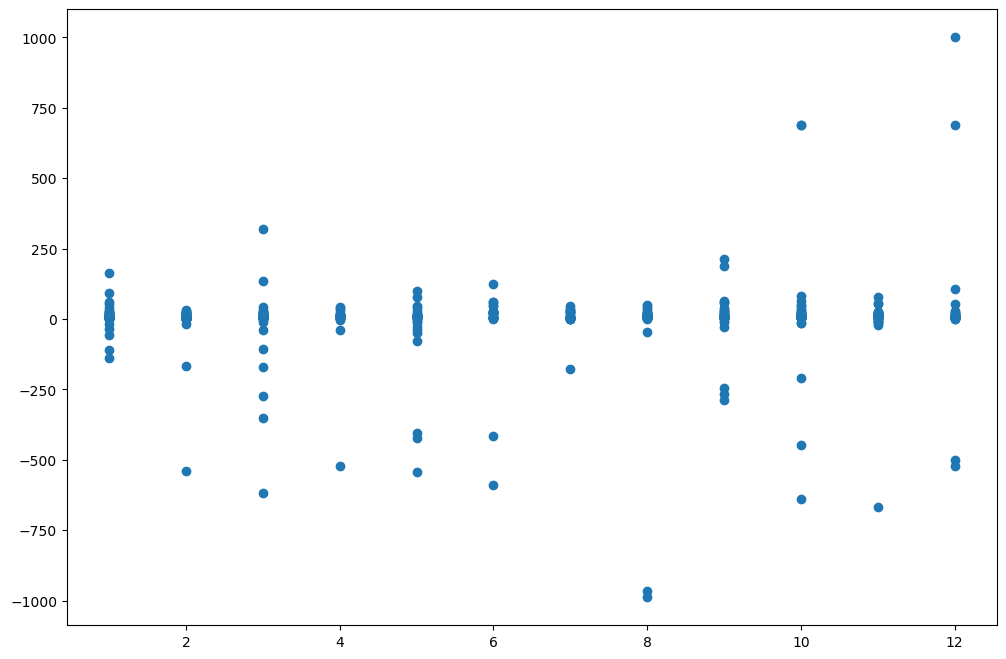

In [258]:
plt.figure(figsize=(12,8))
plt.scatter(data=df, x='Month', y='Money Spent')

#scatter plot of Money Spent vs Month

In [259]:
x=df['Month']
y=df['Money Spent']
x.corr(y)

#getting a correlation coefficent between x and y, clearly no linear relationship between Month and money spent

0.03867340159579912

<AxesSubplot:xlabel='Money Spent', ylabel='Density'>

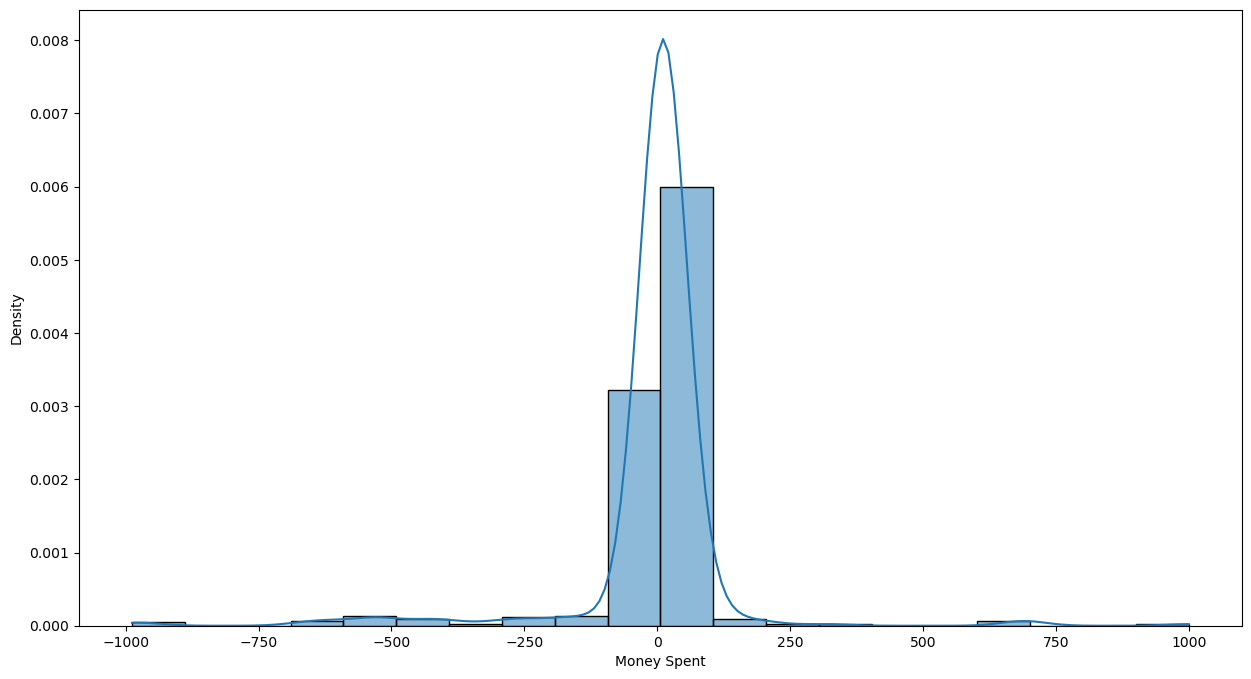

In [260]:
plt.figure(figsize=(15,8))
sns.histplot(x='Money Spent',data=df,bins=20,kde=True,stat='density')

#histogram of money spent

In [261]:
fig = px.line(df, x='Dates', y="Money Spent")
fig.show()

# time series plot of money spent vs dates

In [262]:
fig = px.line(df, x='Month', y="Money Spent")
fig.show()


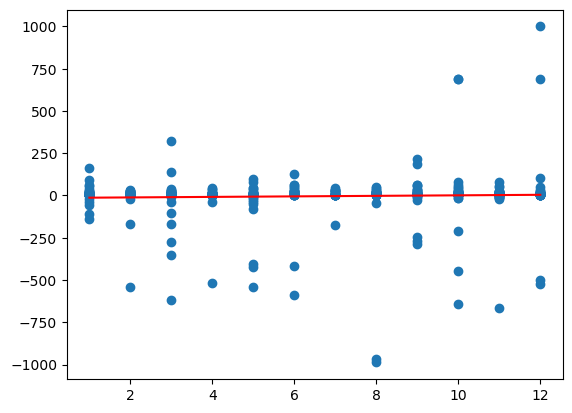

Regression Line Equation= 1.54678067251763 X + -14.50036456992845


In [263]:
X=df['Month'].values.reshape(-1, 1)
Y=df['Money Spent'].values.reshape(-1, 1)

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

#linear regression model, almost constant 



N = len(X)


x_mean = X.mean()
y_mean = Y.mean()
 
B1_num = ((x - x_mean) * (y - y_mean)).sum()
B1_den = ((x - x_mean)**2).sum()
B1 = B1_num / B1_den
    
B0 = y_mean - (B1*x_mean)
    

print ("Regression Line Equation=", B1,"X +",B0)


In [264]:
df.groupby('Type of Transaction')['Money Spent'].mean()





 


Type of Transaction
Food             12.120138
Groceries        21.739062
Paid           -213.031429
Personal         35.154286
Rent            523.600000
Subscription     27.785000
Venmo            18.434486
Name: Money Spent, dtype: float64

In [265]:
df.groupby('Type of Transaction')['Money Spent'].sum()


Type of Transaction
Food             1757.42
Groceries         695.65
Paid           -11929.76
Personal         2952.96
Rent             2094.40
Subscription      333.42
Venmo            1972.49
Name: Money Spent, dtype: float64

In [266]:
df['Type of Transaction'].value_counts()


Food            145
Venmo           107
Personal         84
Paid             56
Groceries        32
Subscription     12
Rent              4
Name: Type of Transaction, dtype: int64

<AxesSubplot:xlabel='Type of Transaction', ylabel='count'>

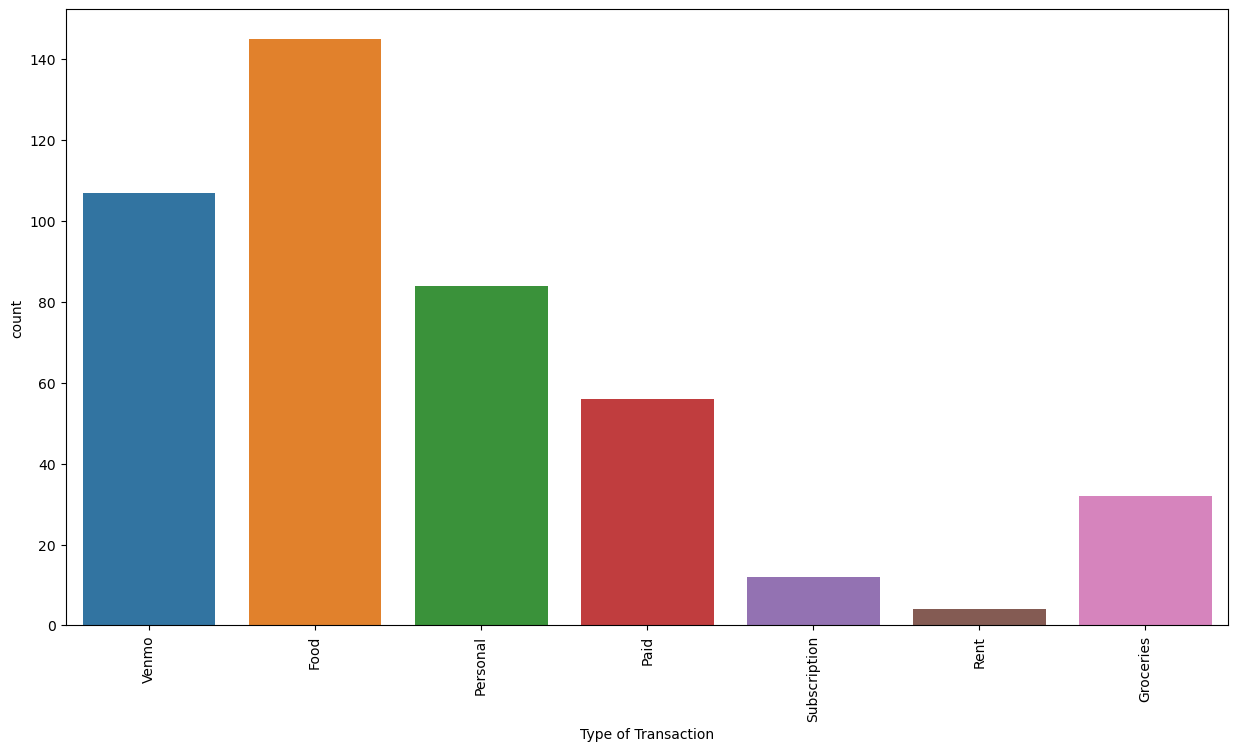

In [267]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.countplot(x='Type of Transaction',data=df)

In [268]:
fig=px.histogram(df,x='Type of Transaction',title="Distribution of the Types of Transactions") 

fig.update_xaxes(categoryorder='total ascending') 


fig.show() #to actually show the histogram

<AxesSubplot:xlabel='Month', ylabel='Money Spent'>

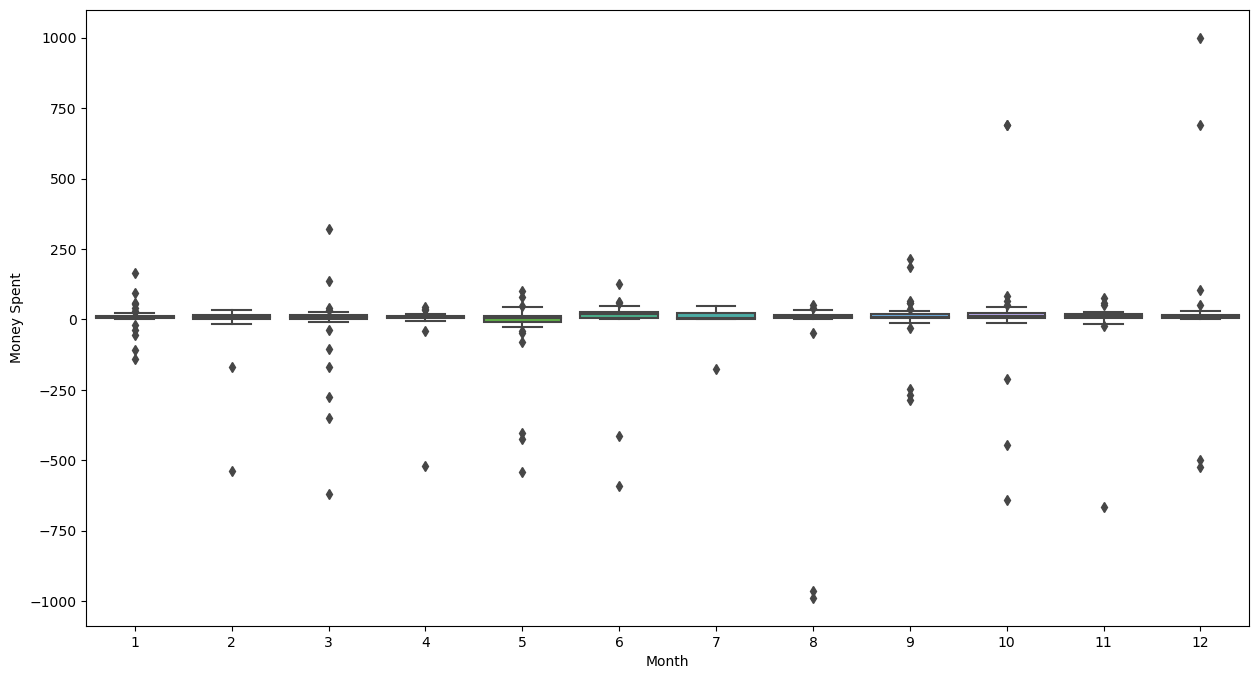

In [269]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df,x="Month",y='Money Spent')

#compare the distributions of money spent for each month

<Figure size 1500x800 with 0 Axes>

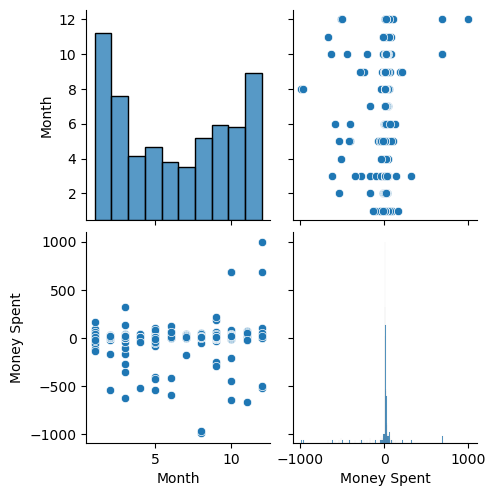

In [270]:
df_new=df.loc[:,['Month', 'Money Spent']]
plt.figure(figsize=(15,8))
sns.pairplot(df_new)

In [271]:
df.groupby('Month')['Money Spent'].sum()


Month
1      434.45
2     -393.79
3     -593.23
4     -240.94
5    -1125.35
6     -413.12
7      128.07
8    -1569.62
9      114.62
10     683.49
11    -232.63
12    1084.63
Name: Money Spent, dtype: float64

Spending Bank Statement

- Includes only my money spent

In [272]:
df_spend=pd.read_csv('/Users/eric/Documents/Github/Personal_Bank_Budgeting/Checking1.csv')
df_spend.head()

,12/30/22,-17,*,Venmo,PURCHASE AUTHORIZED ON 12/30 VENMO* Visa Direct NY S302364781105329 CARD 7605
0,12/30/22,-4.00,*,Venmo,PURCHASE AUTHORIZED ON 12/29 VENMO* Visa Direc...
1,12/30/22,-5.25,*,Food,PURCHASE AUTHORIZED ON 12/28 BEI YUAN TEA & BO...
2,12/28/22,-6.00,*,Venmo,PURCHASE AUTHORIZED ON 12/27 VENMO* San Jose C...
3,12/27/22,-2.75,*,Venmo,PURCHASE AUTHORIZED ON 12/27 VENMO* Visa Direc...
4,12/27/22,-7.00,*,Venmo,PURCHASE AUTHORIZED ON 12/27 VENMO* Visa Direc...


In [273]:
df_spend.rename(columns={'12/30/22': 'Dates'},inplace=True)
df_spend.rename(columns={'-17': 'Money Spent'},inplace=True)
df_spend.rename(columns={'Venmo':'Type of Transaction'},inplace=True)
df_spend.rename(columns={'PURCHASE AUTHORIZED ON 12/30 VENMO* Visa Direct NY S302364781105329 CARD 7605':'Transaction'},inplace=True)
del df_spend['*']


df_spend['Money Spent'] = df_spend['Money Spent'].multiply(-1)


df_spend.head()
df_spend

len(df_spend)

#same code as before, rename all column names and 
# multiply by -1 to represent spent money as positive

440

In [274]:
for x in df_spend.index:
    if (df.loc[x,'Money Spent']<0):
        df_spend=df_spend.drop(x)


len(df_spend)

#loop through each row, if money spent is negative(aka money earned)
#delete the value from the dataset



df_spend



,Dates,Money Spent,Type of Transaction,Transaction
0,12/30/22,4.00,Venmo,PURCHASE AUTHORIZED ON 12/29 VENMO* Visa Direc...
1,12/30/22,5.25,Food,PURCHASE AUTHORIZED ON 12/28 BEI YUAN TEA & BO...
2,12/28/22,6.00,Venmo,PURCHASE AUTHORIZED ON 12/27 VENMO* San Jose C...
3,12/27/22,2.75,Venmo,PURCHASE AUTHORIZED ON 12/27 VENMO* Visa Direc...
4,12/27/22,7.00,Venmo,PURCHASE AUTHORIZED ON 12/27 VENMO* Visa Direc...
...,...,...,...,...
433,1/3/22,4.88,Food,PURCHASE AUTHORIZED ON 01/02 HUDSONNEWS ST1146...
434,1/3/22,5.10,Food,PURCHASE AUTHORIZED ON 01/01 GONG CHA - CONVOY...
435,1/3/22,164.12,Food,PURCHASE AUTHORIZED ON 01/01 HANDOO SAN DIEGO ...
436,1/3/22,4.95,Food,PURCHASE AUTHORIZED ON 01/01 CHICK-FIL-A #0381...


In [275]:
df_spend.describe()


,Money Spent
count,384.000000
mean,25.537344
std,82.380574
min,0.010000
25%,5.115000
50%,10.515000
75%,20.000000
max,1000.000000


In [276]:
df_spend['Dates'] = pd.to_datetime(df_spend['Dates'])



df_spend['Month'] = df_spend['Dates'].dt.month 

df_spend



,Dates,Money Spent,Type of Transaction,Transaction,Month
0,2022-12-30,4.00,Venmo,PURCHASE AUTHORIZED ON 12/29 VENMO* Visa Direc...,12
1,2022-12-30,5.25,Food,PURCHASE AUTHORIZED ON 12/28 BEI YUAN TEA & BO...,12
2,2022-12-28,6.00,Venmo,PURCHASE AUTHORIZED ON 12/27 VENMO* San Jose C...,12
3,2022-12-27,2.75,Venmo,PURCHASE AUTHORIZED ON 12/27 VENMO* Visa Direc...,12
4,2022-12-27,7.00,Venmo,PURCHASE AUTHORIZED ON 12/27 VENMO* Visa Direc...,12
...,...,...,...,...,...
433,2022-01-03,4.88,Food,PURCHASE AUTHORIZED ON 01/02 HUDSONNEWS ST1146...,1
434,2022-01-03,5.10,Food,PURCHASE AUTHORIZED ON 01/01 GONG CHA - CONVOY...,1
435,2022-01-03,164.12,Food,PURCHASE AUTHORIZED ON 01/01 HANDOO SAN DIEGO ...,1
436,2022-01-03,4.95,Food,PURCHASE AUTHORIZED ON 01/01 CHICK-FIL-A #0381...,1


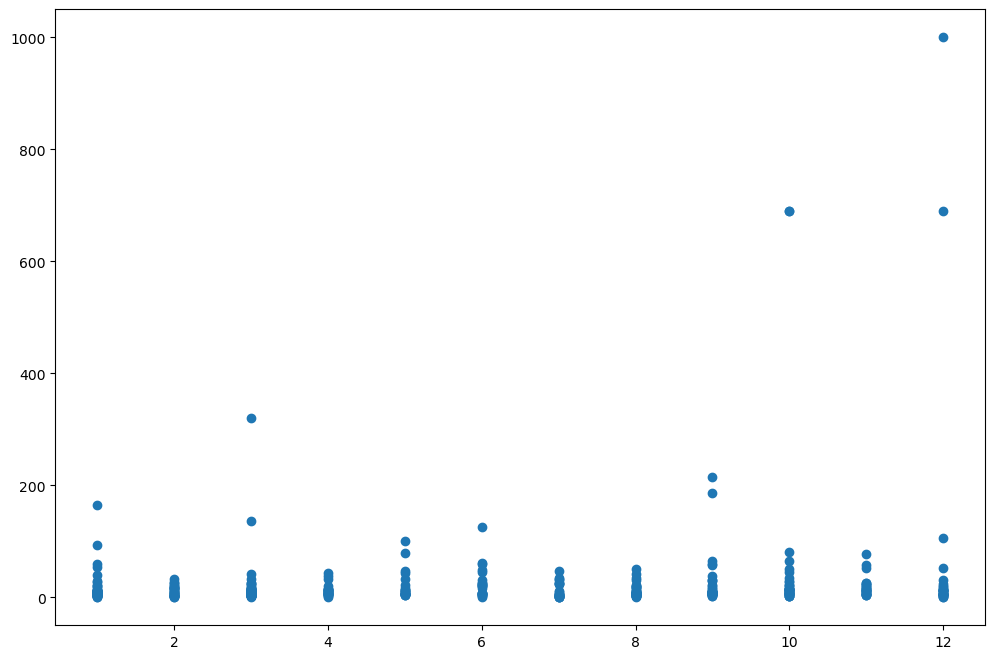

In [277]:
plt.figure(figsize=(12,8))
plt.scatter(data=df_spend, x='Month', y='Money Spent')


<AxesSubplot:xlabel='Money Spent', ylabel='Density'>

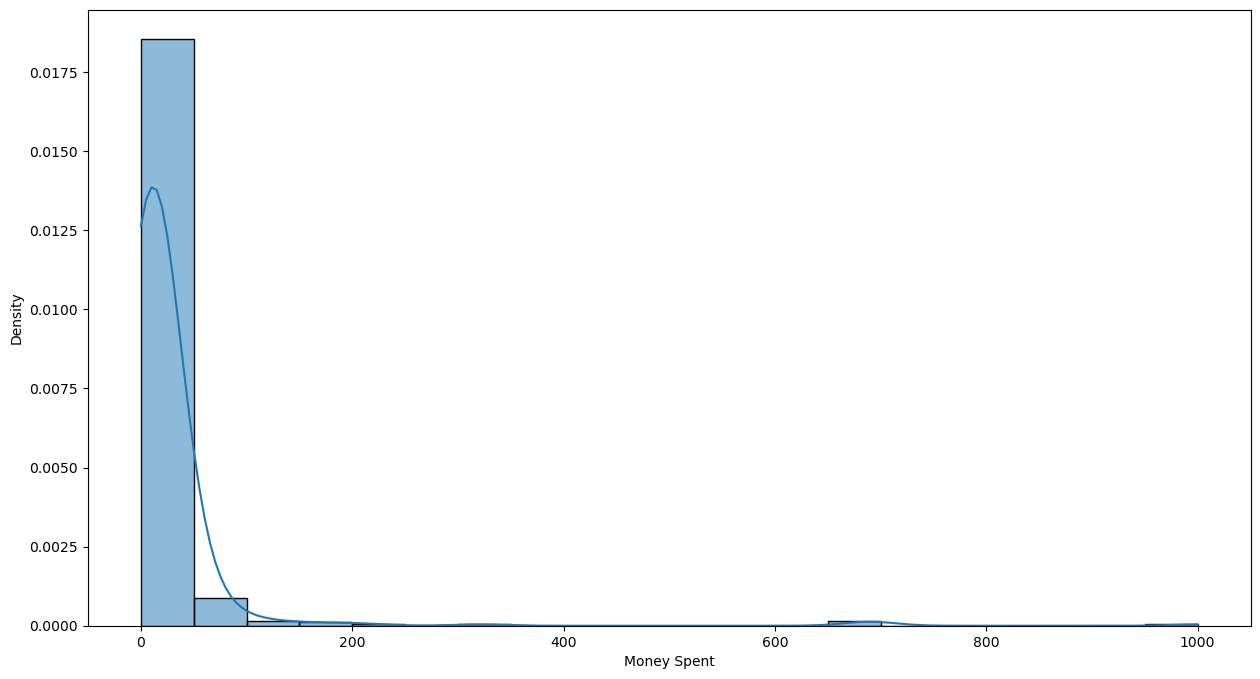

In [278]:
plt.figure(figsize=(15,8))
sns.histplot(x='Money Spent',data=df_spend,bins=20,kde=True,stat='density')


In [279]:
#remove outliers

for x in df_spend.index:
    if df_spend.loc[x, 'Money Spent']>200:
        df_spend=df_spend.drop(x)
len(df_spend)




378

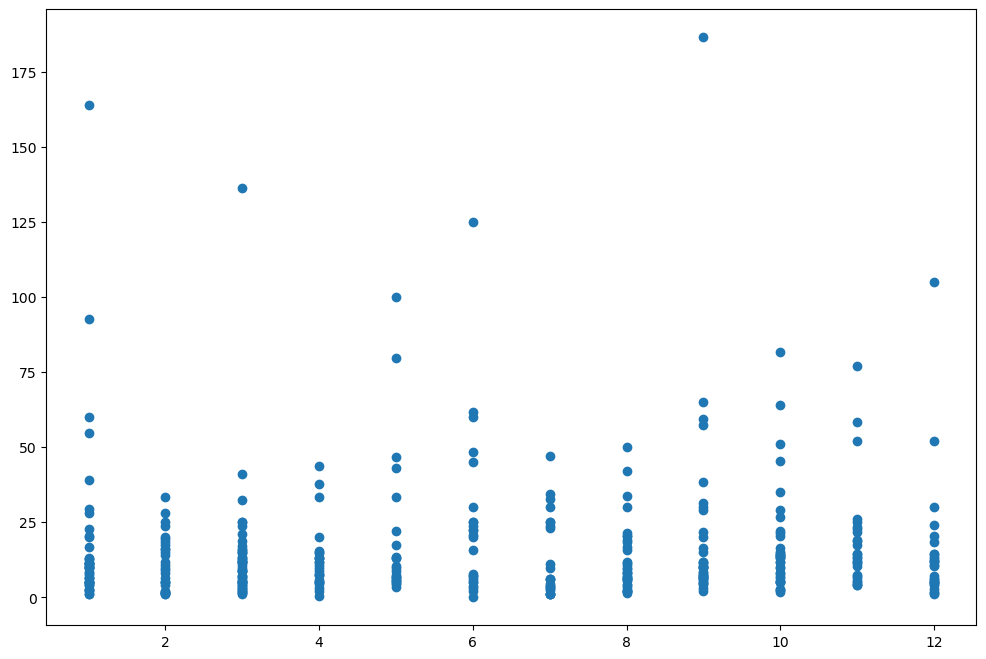

In [280]:
plt.figure(figsize=(12,8))
plt.scatter(data=df_spend, x='Month', y='Money Spent')

<AxesSubplot:xlabel='Money Spent', ylabel='Density'>

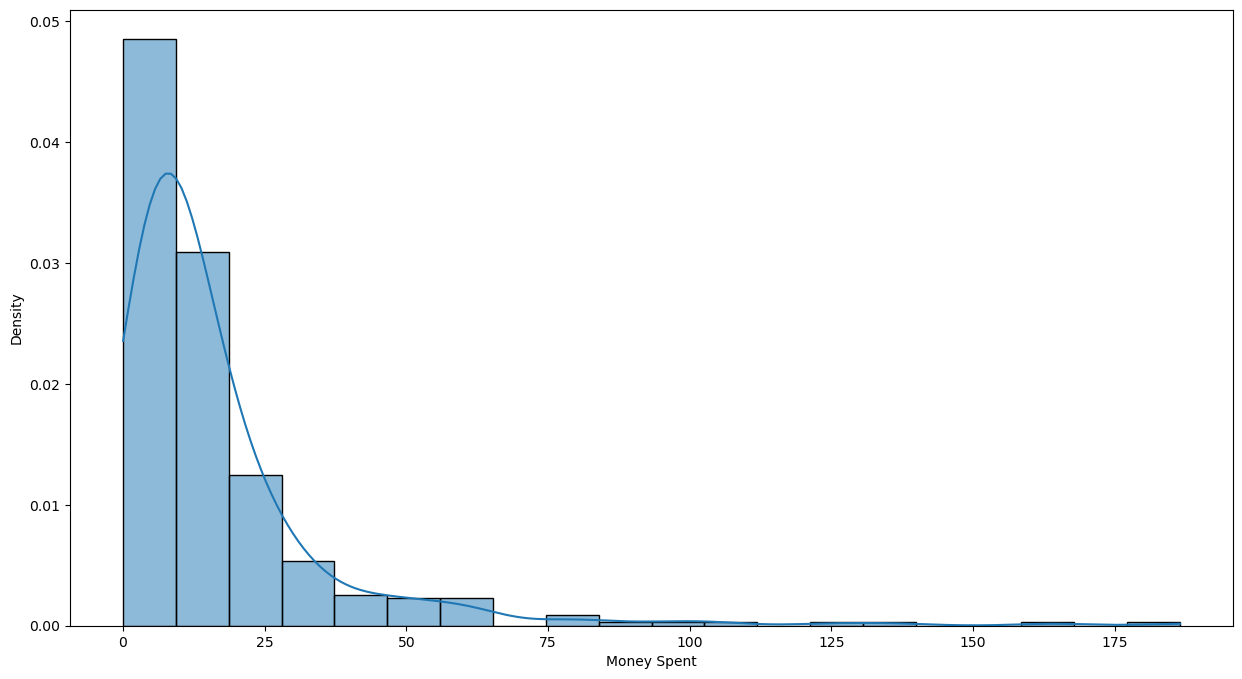

In [281]:
plt.figure(figsize=(15,8))
sns.histplot(x='Money Spent',data=df_spend,bins=20,kde=True,stat='density')

In [282]:
fig = px.line(df_spend, x='Dates', y="Money Spent")
fig.show()

In [283]:
fig = px.line(df_spend, x='Month', y="Money Spent")
fig.show()

<Figure size 1500x800 with 0 Axes>

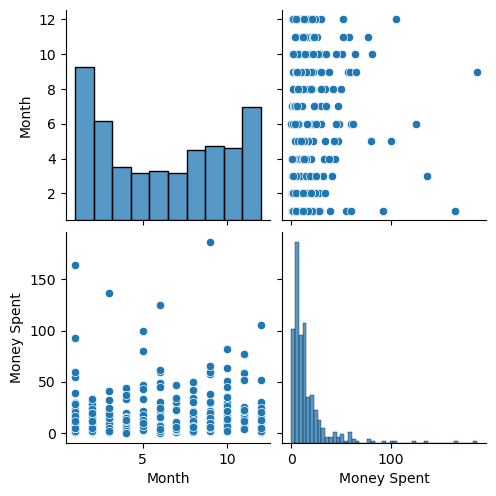

In [284]:
df_new2=df_spend.loc[:,['Month', 'Money Spent']]
plt.figure(figsize=(15,8))
sns.pairplot(df_new2)

<AxesSubplot:xlabel='Month', ylabel='Money Spent'>

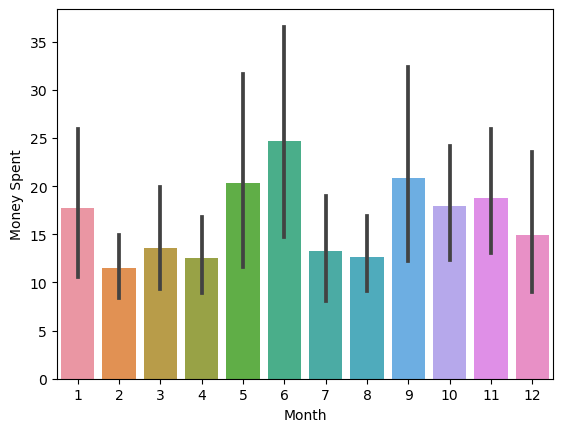

In [285]:

sns.barplot(data=df_spend, x="Month", y="Money Spent")

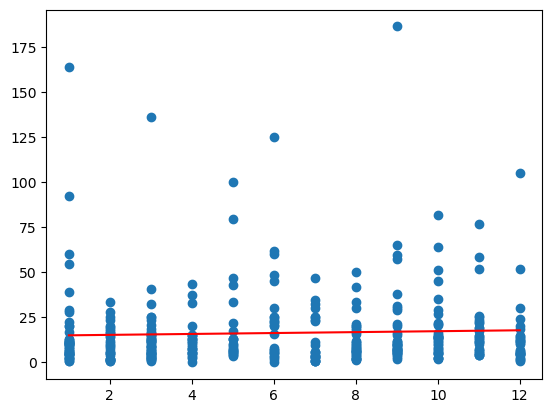

Regression Line Equation= -21.68961138814513 X + 151.25213429137844


In [286]:
X=df_spend['Month'].values.reshape(-1, 1)
Y=df_spend['Money Spent'].values.reshape(-1, 1)

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

#linear regression model, almost constant 



N = len(X)


x_mean = X.mean()
y_mean = Y.mean()
 
B1_num = ((x - x_mean) * (y - y_mean)).sum()
B1_den = ((x - x_mean)**2).sum()
B1 = B1_num / B1_den
    
B0 = y_mean - (B1*x_mean)
    

print ("Regression Line Equation=", B1,"X +",B0)

Mint.com Given Data Set

-Better Data that is easier to read
-More categories already labeled 

In [287]:
df_mint=pd.read_csv('/Users/eric/Documents/Github/Personal_Bank_Budgeting/transactions.csv')

#upload new dataset from mint

In [288]:
df_mint.head()

,Date,Description,Original Description,Amount,Transaction Type,Category,Account Name,Labels,Notes
0,2/21/2023,PURCHASE AUTHOR...,PURCHASE AUTHOR...,7.20,debit,Fast Food,Eric's Account,NaN,NaN
1,2/21/2023,PURCHASE AUTHOR...,PURCHASE AUTHOR...,18.39,debit,Shopping,Eric's Account,NaN,NaN
2,2/21/2023,PURCHASE AUTHOR...,PURCHASE AUTHOR...,5.19,debit,Fast Food,Eric's Account,NaN,NaN
3,2/14/2023,PURCHASE AUTHOR...,PURCHASE AUTHOR...,15.03,debit,Office Supplies,Eric's Account,NaN,NaN
4,2/13/2023,PURCHASE AUTHOR...,PURCHASE AUTHOR...,21.54,debit,Shopping,Eric's Account,NaN,NaN


In [289]:
df_mint.describe()


,Amount,Labels,Notes
count,663.000000,0.0,0.0
mean,47.449653,NaN,NaN
std,145.226337,NaN,NaN
min,0.010000,NaN,NaN
25%,5.805000,NaN,NaN
50%,11.710000,NaN,NaN
75%,23.735000,NaN,NaN
max,1842.130000,NaN,NaN


In [290]:
for x in df_mint.index:
    if df_mint.loc[x, 'Category']=='Income' or df_mint.loc[x, 'Category']=='Paycheck':
        df_mint=df_mint.drop(x)





len(df_mint)

#drop every time I make income, only concerned with spending



607

In [291]:
df_mint = df_mint.loc[::-1]

fig = px.line(df_mint1, x='Date', y="Amount", title="Money Spent Through Time")
fig.show()



In [292]:
df_mint['Date'] = pd.to_datetime(df_mint['Date'])



df_mint['Month'] = df_mint['Date'].dt.month 

df_mint

,Date,Description,Original Description,Amount,Transaction Type,Category,Account Name,Labels,Notes,Month
662,2021-09-24,Amazon,PURCHASE AUTHOR...,24.89,debit,Shopping,Eric's Account,NaN,NaN,9
661,2021-09-24,Ace Hardware,PURCHASE AUTHOR...,1.00,debit,Home Improvement,Eric's Account,NaN,NaN,9
660,2021-09-27,Pacsun,PURCHASE AUTHOR...,23.78,debit,Restaurants,Eric's Account,NaN,NaN,9
659,2021-09-27,In-N-Out Burger,PURCHASE AUTHOR...,5.79,debit,Fast Food,Eric's Account,NaN,NaN,9
658,2021-09-27,ZUMIEZ #379 VACAVILLE CA P00000000275053465 CA...,PURCHASE AUTHOR...,40.52,debit,Clothing,Eric's Account,NaN,NaN,9
...,...,...,...,...,...,...,...,...,...,...
4,2023-02-13,PURCHASE AUTHOR...,PURCHASE AUTHOR...,21.54,debit,Shopping,Eric's Account,NaN,NaN,2
3,2023-02-14,PURCHASE AUTHOR...,PURCHASE AUTHOR...,15.03,debit,Office Supplies,Eric's Account,NaN,NaN,2
2,2023-02-21,PURCHASE AUTHOR...,PURCHASE AUTHOR...,5.19,debit,Fast Food,Eric's Account,NaN,NaN,2
1,2023-02-21,PURCHASE AUTHOR...,PURCHASE AUTHOR...,18.39,debit,Shopping,Eric's Account,NaN,NaN,2


In [293]:
df_mint.groupby(['Category', 'Amount']).mean()

Labels  Notes  Month
Category       Amount                       
Air Travel     9.50        NaN    NaN    8.0
Alcohol & Bars 15.61       NaN    NaN    3.0
               25.00       NaN    NaN    2.0
Amusement      16.47       NaN    NaN    9.0
Books          8.38        NaN    NaN    8.0
...                        ...    ...    ...
Transfer       689.80      NaN    NaN   10.0
               1000.00     NaN    NaN   12.0
Utilities      1.00        NaN    NaN    2.0
               1.95        NaN    NaN    2.0
               4.99        NaN    NaN    6.5

[512 rows x 3 columns]

In [294]:
df_mint.groupby(['Category', 'Amount']).sum()

Labels  Notes  Month
Category       Amount                       
Air Travel     9.50        0.0    0.0      8
Alcohol & Bars 15.61       0.0    0.0      3
               25.00       0.0    0.0      2
Amusement      16.47       0.0    0.0      9
Books          8.38        0.0    0.0      8
...                        ...    ...    ...
Transfer       689.80      0.0    0.0     10
               1000.00     0.0    0.0     12
Utilities      1.00        0.0    0.0      2
               1.95        0.0    0.0      2
               4.99        0.0    0.0     13

[512 rows x 3 columns]

In [295]:
df_mint['Category'].value_counts()


Transfer                  167
Fast Food                  97
Restaurants                93
Shopping                   79
Groceries                  29
Laundry                    19
Entertainment              17
Electronics & Software     13
Pharmacy                   13
Education                   8
Mortgage & Rent             8
Coffee Shops                8
Gym                         7
Clothing                    6
Furnishings                 5
Personal Care               5
Food & Dining               4
Gas & Fuel                  4
Utilities                   4
Public Transportation       3
Alcohol & Bars              2
Gift                        2
Parking                     2
Newspapers & Magazines      2
Ride Share                  1
Rental Car & Taxi           1
Food Delivery               1
Home Improvement            1
Cash & ATM                  1
Books                       1
Air Travel                  1
Amusement                   1
Sporting Goods              1
Office Sup

<AxesSubplot:xlabel='Category', ylabel='count'>

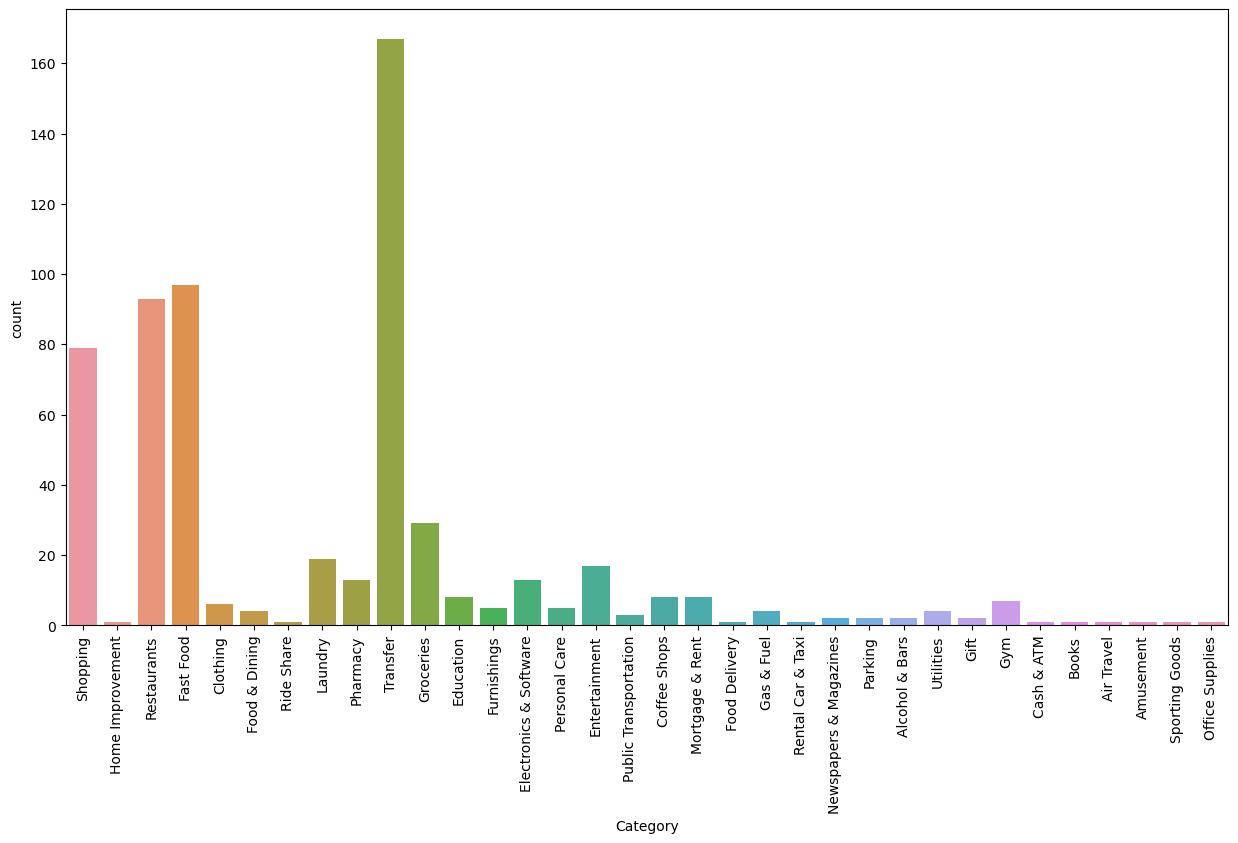

In [296]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.countplot(x='Category',data=df_mint)

In [297]:
fig=px.histogram(df_mint,x='Category',title="Distribution of the Types of Transactions") 

fig.update_xaxes(categoryorder='total ascending') 


fig.show() #to actually show the histogram